# Gradients

Understanding gradients will allow us to eventually understand edge detection which we will use later on, since its an important aspect of object detection in general.
Make sure to watch the lecture video for the full overview

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('/Users/clcx/Documents/GitHub/OpenCv-Deep-Learning/Pierian/DATA/sudoku.jpg',0)

In [6]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

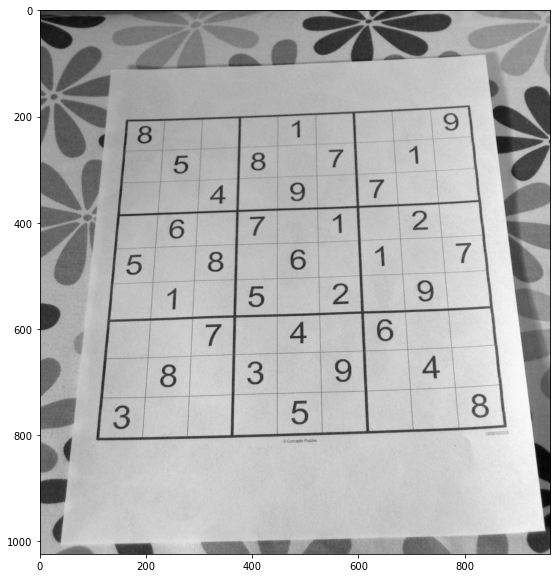

In [8]:
display_img(img)

jadi kalo gradient sobelx itu yang garis horizontalnya jadi pudar, cuma keliatan yang vertikal, DAN kalo sobely itu sebaliknya

In [9]:
# x itu 1,0
# y itu 0,1
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

In [11]:
# method lain
# laplacian
laplacian = cv2.Laplacian(img,cv2.CV_64F)

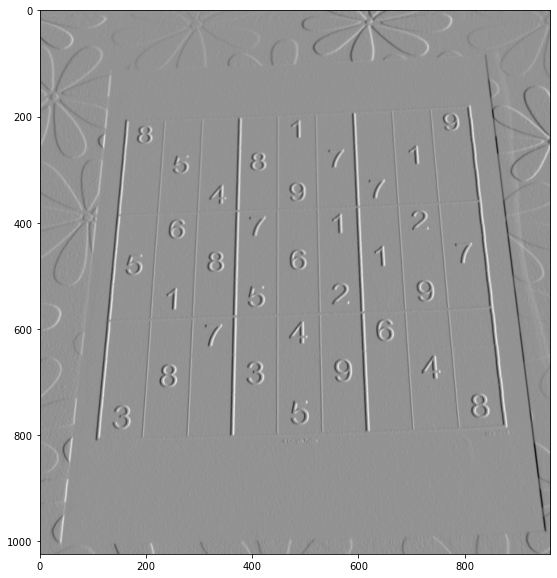

In [12]:
display_img(sobelx)

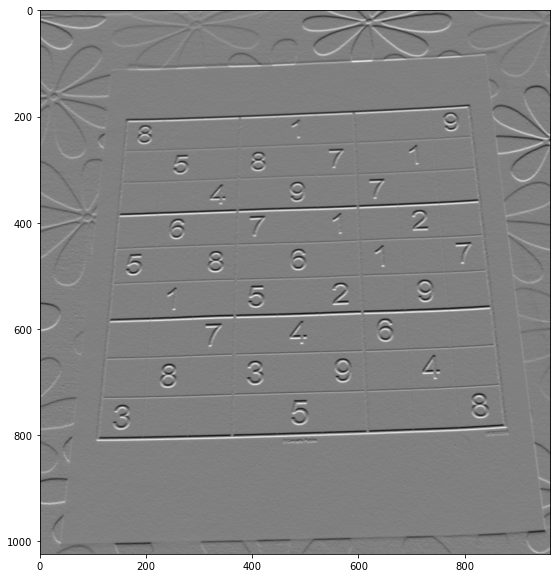

In [13]:
display_img(sobely)

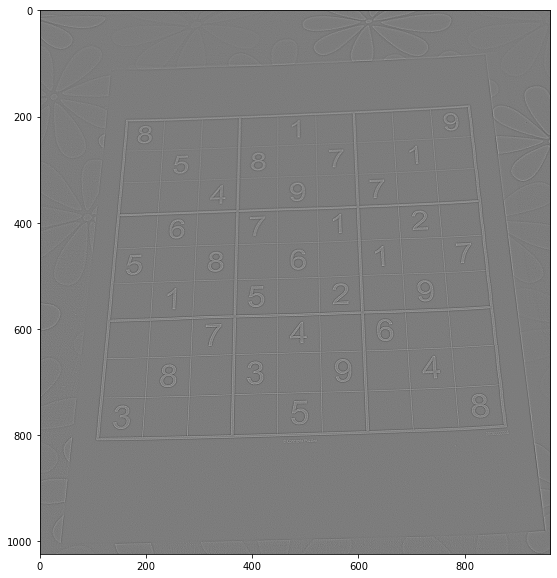

In [14]:
display_img(laplacian)

## Combining All Ideas
kita bisa combine2in terus main2in semua ide2 yang pernah di pelajarin kayak threshold, morphological, dll

#### Blending Images

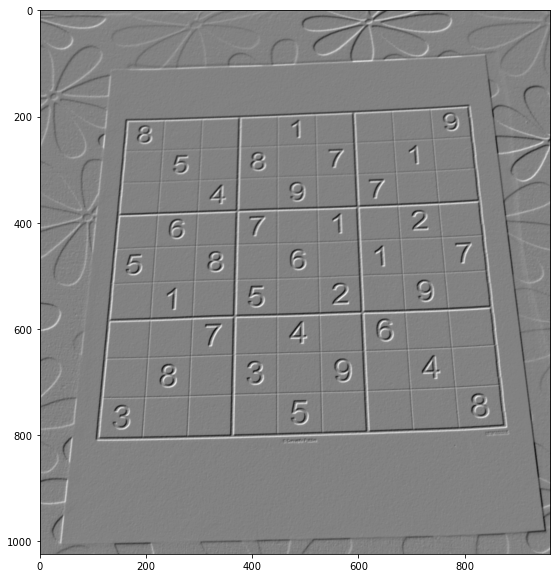

In [15]:
# kita coba combine sobelx sama sobely
# biar keliatan seimbang vertikal horizontal
blended = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)
display_img(blended)

In [16]:
blended.shape

(1024, 962)

#### Morphological Operators

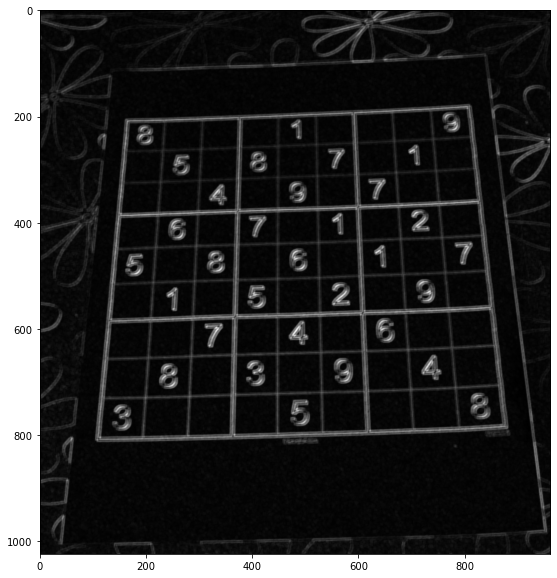

In [19]:
# kita pake morph gradient ke gambar blended
kernel = np.ones((4,4),np.uint8)
gradient = cv2.morphologyEx(blended,cv2.MORPH_GRADIENT,kernel)
display_img(gradient)

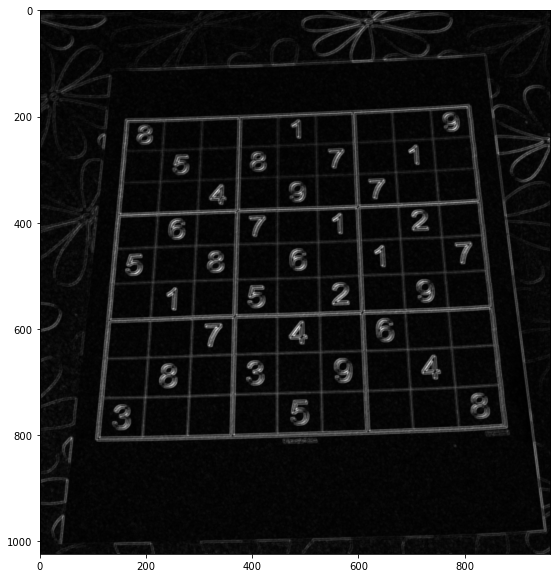

In [21]:
# kita cobain ke hasil laplacian
kernel = np.ones((3,3),np.uint8)
gradient = cv2.morphologyEx(blended,cv2.MORPH_GRADIENT,kernel)
display_img(gradient)

#### Thresholds

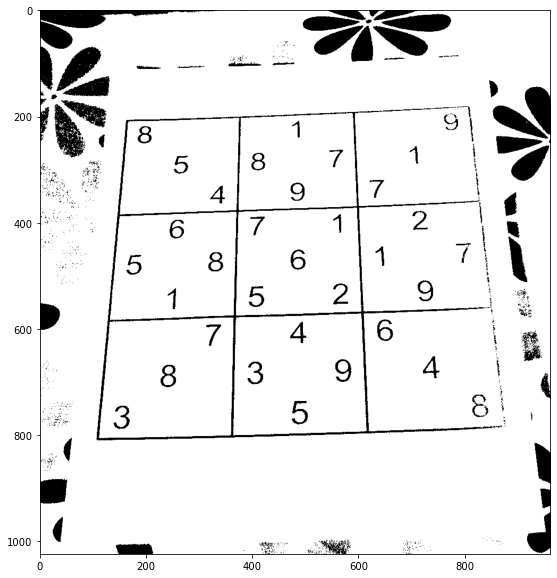

In [22]:
ret,th1 = cv2.threshold(img,100,255,cv2.THRESH_BINARY)
display_img(th1)

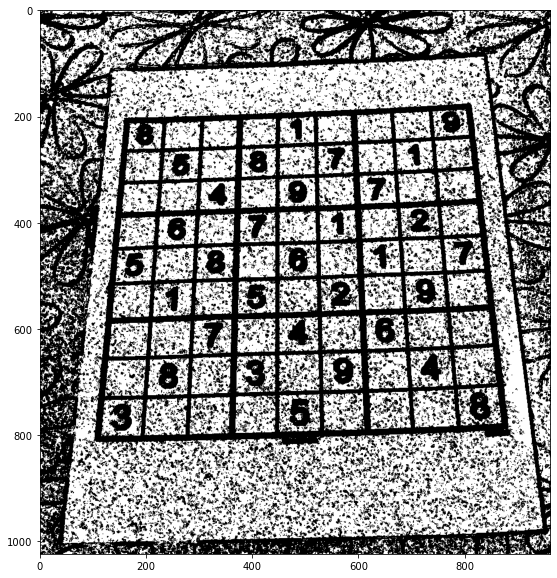

In [23]:
ret,th1 = cv2.threshold(gradient,200,255,cv2.THRESH_BINARY_INV)
display_img(th1)

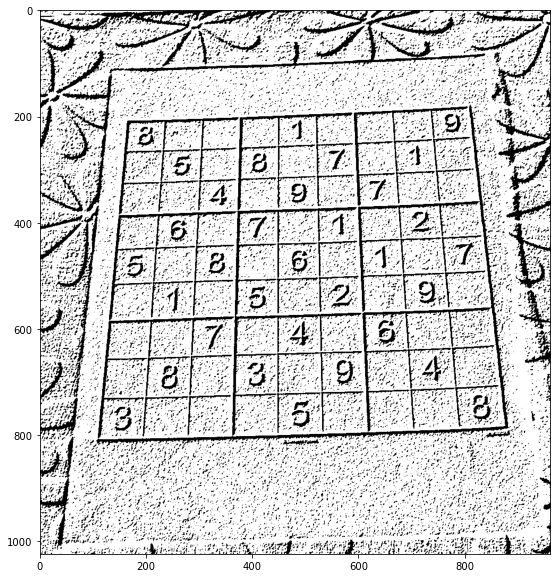

In [24]:
ret,th1 = cv2.threshold(blended,100,255,cv2.THRESH_BINARY_INV)
display_img(th1)

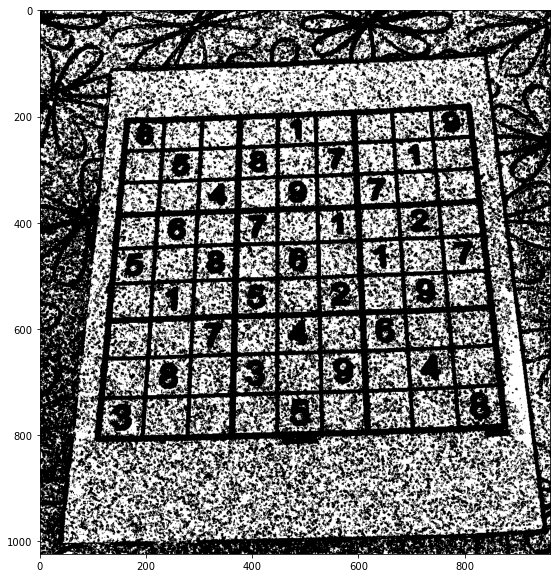

In [25]:
ret,th1 = cv2.threshold(gradient,170,255,cv2.THRESH_BINARY_INV)
display_img(th1)